In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error , mean_squared_error


In [5]:
df = pd.read_csv("train.csv")

df.head()
#df.to_excel("train.xlsx")



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_dropped["Age"] = df_dropped["Age"].fillna(value = 24.69)


In [7]:
df_dropped = df

df_dropped = df_dropped.drop('Ticket', axis = 'columns')
df_dropped = df_dropped.drop('Name', axis = 'columns')
df_dropped = df_dropped.drop('Cabin', axis = 'columns')
df_dropped = df_dropped.drop('PassengerId', axis = 'columns')


df_dropped.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [68]:
df_dropped.to_excel("df_dropped.xlsx")

In [9]:
df_dropped = df_dropped.dropna()

In [10]:
df_dropped.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
df_dropped.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df_ready = df_dropped

le = LabelEncoder()

df_ready["Sex"] = le.fit_transform(df_ready.Sex)
df_ready["Embarked"] = le.fit_transform(df_ready.Embarked)


In [90]:
df_ready

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.2500,2
1,1,1,0,38.00,1,0,71.2833,0
2,1,3,0,26.00,0,0,7.9250,2
3,1,1,0,35.00,1,0,53.1000,2
4,0,3,1,35.00,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.00,0,0,13.0000,2
887,1,1,0,19.00,0,0,30.0000,2
888,0,3,0,24.69,1,2,23.4500,2
889,1,1,1,26.00,0,0,30.0000,0


<Axes: >

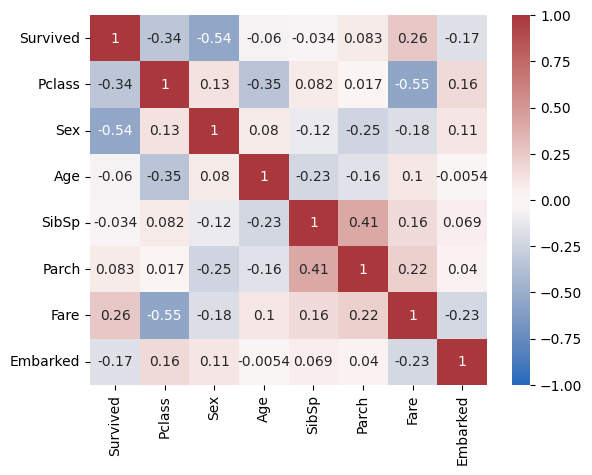

In [13]:
sns.heatmap(df_ready.corr(), annot = True,vmin = -1, vmax = 1, cmap='vlag' )

In [16]:
#Hedef Değerler
y = df_ready["Survived"].values

#Değişkenler
x = df_ready[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].values

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33)

In [17]:
scaler = MinMaxScaler()

scaler = scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

In [18]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(5,activation = "relu"))
model.add(tf.keras.layers.Dense(5,activation = "relu"))
model.add(tf.keras.layers.Dense(5,activation = "relu"))
model.add(tf.keras.layers.Dense(5,activation = "relu"))
model.add(tf.keras.layers.Dense(5,activation = "relu"))







model.add(tf.keras.layers.Dense(units =1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [19]:
model.fit(x_train,y_train,epochs = 12,validation_data=(x_test,y_test),verbose=1)

Epoch 1/12

19/19 [==============================] - 1s 12ms/step - loss: 0.6857 - val_loss: 0.6807
Epoch 2/12
19/19 [==============================] - 0s 3ms/step - loss: 0.6784 - val_loss: 0.6738
Epoch 3/12
19/19 [==============================] - 0s 3ms/step - loss: 0.6714 - val_loss: 0.6653
Epoch 4/12
19/19 [==============================] - 0s 4ms/step - loss: 0.6630 - val_loss: 0.6550
Epoch 5/12
19/19 [==============================] - 0s 4ms/step - loss: 0.6534 - val_loss: 0.6436
Epoch 6/12
19/19 [==============================] - 0s 3ms/step - loss: 0.6427 - val_loss: 0.6293
Epoch 7/12
19/19 [==============================] - 0s 3ms/step - loss: 0.6283 - val_loss: 0.6093
Epoch 8/12
19/19 [==============================] - 0s 3ms/step - loss: 0.6060 - val_loss: 0.5903
Epoch 9/12
19/19 [==============================] - 0s 5ms/step - loss: 0.5862 - val_loss: 0.5705
Epoch 10/12
19/19 [==============================] - 0s 3ms/step - loss: 0.5669 - val_loss: 0.5545
Epoch 11/12
19/19

In [20]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

19/19 [==============================] - 0s 1ms/step - loss: 0.5246
0.524598240852356
10/10 [==============================] - 0s 1ms/step - loss: 0.5231
0.523093044757843


In [21]:
loss = model.history.history["loss"]
sns.lineplot(x=range(len(loss)),y=loss)

KeyError: 'loss'

In [22]:
testTahminleri = model.predict(x_test)

10/10 [==============================] - 0s 1ms/step


In [23]:
sonuç_df  = pd.DataFrame(testTahminleri,columns = ["Tahmin Sonucu"])
gerçek_df = pd.DataFrame(y_test,columns = ["Gerçek Değer"])
compare_df = pd.concat([sonuç_df,gerçek_df],axis = 1)

In [24]:
compare_df

,Tahmin Sonucu,Gerçek Değer
0,0.613415,1
1,0.244954,1
2,0.522332,1
3,0.212200,0
4,0.611189,1
...,...,...
289,0.520415,1
290,0.289436,0
291,0.613535,0
292,0.208000,0
